# *In Silico* Profiling of Antimicrobial Activity of Magainin II Against Several Druggable Bacterial Targets Conferring Antimicrobial Resistance in *Escherichia coli*

## Premilinary Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from chembl_webresource_client.new_client import new_client

from utils.housekeeping import HouseKeeping
from utils.visualization import reconstruct_mol
from utils.calculation import calc_lipinski

/var/home/iaacornus/.anaconda3/envs/bioinformatics_full/lib/python3.10/site-packages/chembl_webresource_client/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __version__ = __import__('pkg_resources').get_distribution('chembl_webresource_client').version


In [2]:
# where the mol figs will be stored
PATHS: list[str] = [
        "../output",
        "../output/chem_figs",
        "../output/data",
        "../output/data/AMP",
        "../output/data/activities",
        "../output/data/targets"
    ]
hk = HouseKeeping(PATHS)

In [3]:
for path_ in PATHS:
    hk.create_output_dir(path_)

In [4]:
# matplotlib font configuration
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

In [5]:
# initiate the client to fetch
# molecule information
molecule_chembl_client = new_client.molecule

## Data Query from ChEMBL

### Retrieval of AMPs

In [6]:
MOLECULE_QUERY: str = "MAGAININ" #! do not change!

In [7]:
amp_query = pd.DataFrame.from_dict(
        molecule_chembl_client.search(
            MOLECULE_QUERY
        )
    )
amp_query

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chemical_probe,chirality,cross_references,dosed_ingredient,first_approval,...,prodrug,score,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_flag
0,[],-1,"{'biocomponents': [], 'description': 'MAGAININ...",0,None,0,-1,[],False,None,...,-1,29.0,BOTH,False,False,None,None,None,None,False
1,[],-1,"{'biocomponents': [], 'description': 'MAGAININ...",0,None,0,-1,[],False,None,...,-1,26.0,BOTH,False,False,None,None,None,None,False
2,[],-1,"{'biocomponents': [], 'description': 'MAGAININ...",0,None,0,-1,[],False,None,...,-1,21.0,BOTH,False,False,None,None,None,None,False
3,[],-1,None,0,None,0,-1,[],False,None,...,-1,15.0,MOL,False,False,None,None,None,None,False
4,[],-1,"{'biocomponents': [], 'description': None, 'he...",0,None,0,-1,[],False,None,...,-1,14.0,BOTH,False,False,None,None,None,None,False
5,[],-1,"{'biocomponents': [], 'description': None, 'he...",0,None,0,-1,[],False,None,...,-1,14.0,BOTH,False,False,None,None,None,None,False
6,[],-1,"{'biocomponents': [], 'description': None, 'he...",0,None,0,-1,[],False,None,...,-1,11.0,BOTH,False,False,None,None,None,None,False
7,[],-1,None,0,None,0,-1,[],False,None,...,-1,11.0,MOL,False,False,None,None,None,None,False
8,[],-1,"{'biocomponents': [], 'description': None, 'he...",0,None,0,-1,[],False,None,...,-1,7.0,BOTH,False,False,None,None,None,None,False


In [8]:
amp_retrieved = pd.DataFrame(
        {
            "mol_name": [ #? preferred name of the molecule
                    pname for pname in
                    amp_query.pref_name
                ],
            "mol_id": [ #? chembl id of the given molecule
                    mid for mid in
                    amp_query.molecule_chembl_id
                ],
            "mol_type": [ #? type of molecule ie protein, small molecule, etc
                    mol_type for mol_type in
                    amp_query.molecule_type
                ],
            "smiles": [ #? canonical smiles, simplified molecular input line entry system
                    smiles["canonical_smiles"] for smiles in
                    amp_query.molecule_structures
                ]
        }
    )
#
# selected_chembl_data = pd.DataFrame.from_dict(
#         selected_chembl_data
#     )
amp_retrieved

,mol_name,mol_id,mol_type,smiles
0,MAGAININ 1,CHEMBL437357,Protein,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)CNC...
1,MAGAININ I,CHEMBL409372,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
2,MAGAININ 2,CHEMBL414933,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
3,None,CHEMBL4088094,Small molecule,CC[C@H](C)[C@H](NC(=O)CNC(C)=O)C(=O)NCC(=O)N[C...
4,None,CHEMBL1673385,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
5,None,CHEMBL1673394,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
6,None,CHEMBL1673389,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
7,None,CHEMBL1673395,Small molecule,CCCCCCCCCCC(=O)NCC(=O)N[C@H](C(=O)NCC(=O)N[C@@...
8,None,CHEMBL412693,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...


#### Visualization of Retrieved AMPs

In [9]:
LEN_CHEMBL_DATA: int = amp_retrieved.__len__()

In [10]:
fig_path = PATHS[1]

In [11]:
for i in range(LEN_CHEMBL_DATA):
    current_mol__ = amp_retrieved.iloc[i]


In [12]:
ulimit: int = LEN_CHEMBL_DATA

while ulimit%3 != 0:
    ulimit += 1

In [13]:
COLS: int = 3
ROWS: int = round(ulimit/3)
MOL_COUNT: int = LEN_CHEMBL_DATA

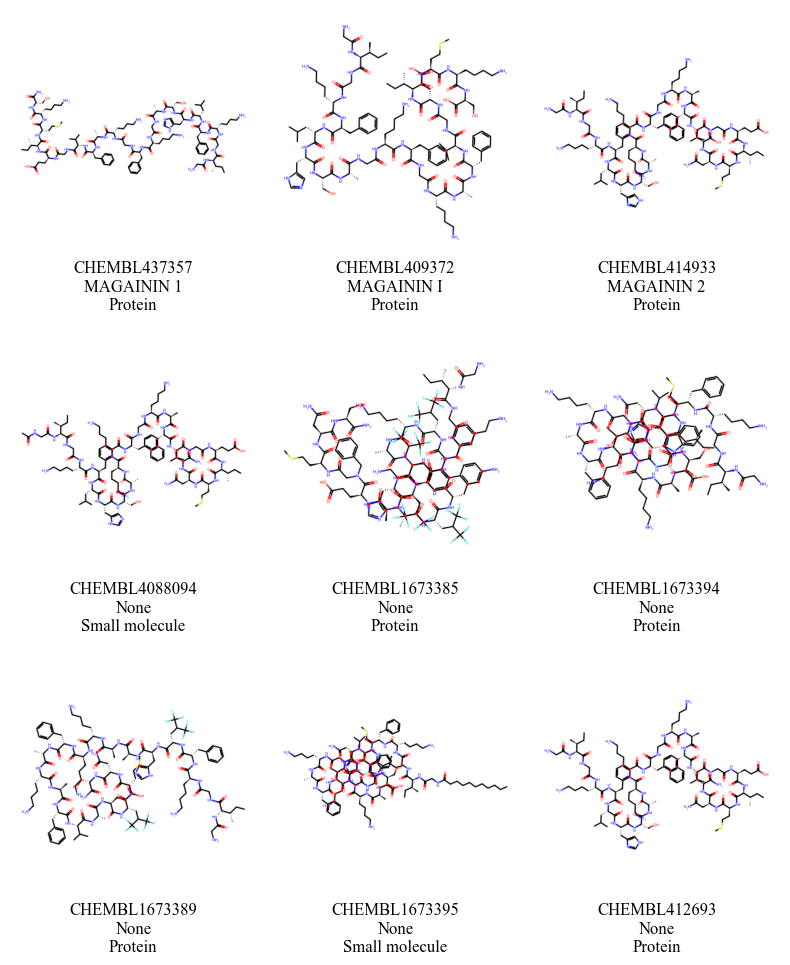

In [14]:
axes_: list = []

fig = plt.figure(figsize=(8,10))
for i in range(ROWS*COLS):

    axes_.append(
        fig.add_subplot(
            ROWS,
            COLS,
            i+1
        )
    )

    current_mol__ = amp_retrieved.iloc[i]
    mname_: str = current_mol__["mol_name"]
    mtype_: str = current_mol__["mol_type"]
    mid_: str = current_mol__["mol_id"]

    if not mname_:
        mname: str = "- - -"

    img_path = f"{mid_}.png"
    axes_[-1].set_title(
        f"{mid_}\n{mname_}\n{mtype_}", y=-0.25
    )
    plt.axis("off")
    plt.imshow(
        Image.open(
            f"{fig_path}/{img_path}"
        )
    )

fig.tight_layout()
plt.savefig(
    f"{fig_path}/molecules.png",
    bbox_inches="tight"
)
plt.show()

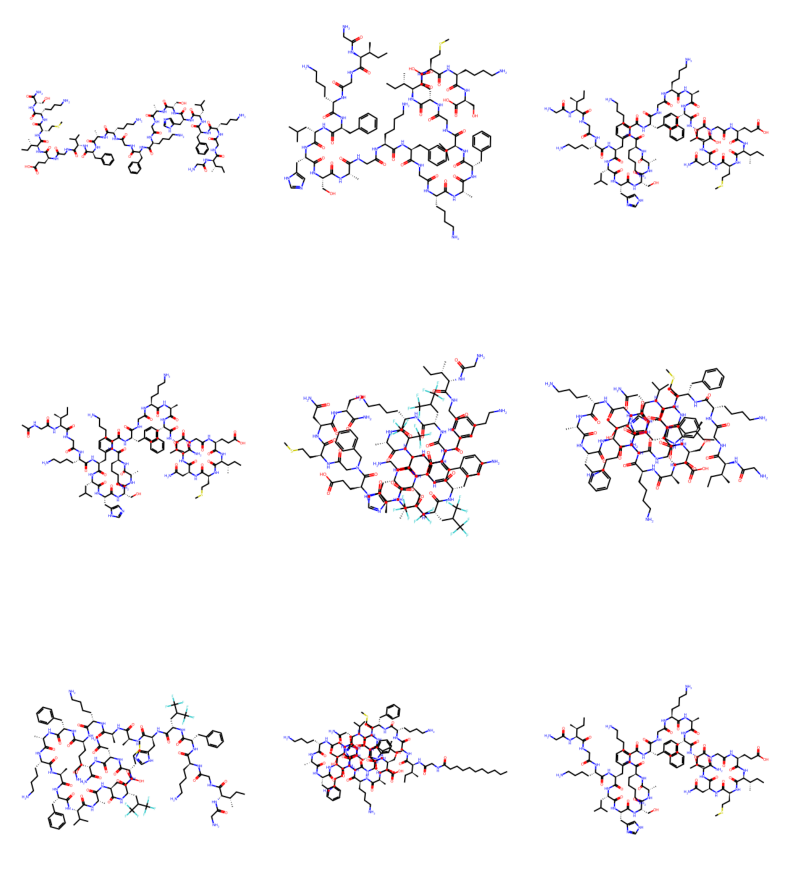

In [15]:
axes_: list = []

fig = plt.figure(figsize=(8,10))
for i in range(ROWS*COLS):

    axes_.append(
        fig.add_subplot(
            ROWS,
            COLS,
            i+1
        )
    )


    chembl_id__: str = amp_retrieved.iloc[i]["mol_id"]
    img_path = f"{chembl_id__}.png"
    plt.axis("off")
    plt.imshow(
        Image.open(
            f"{fig_path}/{img_path}"
        )
    )

fig.tight_layout()
plt.savefig(
    f"{fig_path}/molecules_strip.png",
    bbox_inches="tight",

)
plt.show()

#### Export AMPs Data

In [16]:
amp_retrieved.to_csv(
    f"{PATHS[3]}/AMPs_chembl_data.csv"
)

In [17]:
amp_retrieved

,mol_name,mol_id,mol_type,smiles
0,MAGAININ 1,CHEMBL437357,Protein,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)CNC...
1,MAGAININ I,CHEMBL409372,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
2,MAGAININ 2,CHEMBL414933,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
3,None,CHEMBL4088094,Small molecule,CC[C@H](C)[C@H](NC(=O)CNC(C)=O)C(=O)NCC(=O)N[C...
4,None,CHEMBL1673385,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
5,None,CHEMBL1673394,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
6,None,CHEMBL1673389,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
7,None,CHEMBL1673395,Small molecule,CCCCCCCCCCC(=O)NCC(=O)N[C@H](C(=O)NCC(=O)N[C@@...
8,None,CHEMBL412693,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...


### Compounds with Bioactivities Against Druggable Bacterial Targets

In [18]:
new_target = new_client.target
new_activity = new_client.activity

In [19]:

#! DBT = druggable bacterial targets
DBTs = pd.DataFrame.from_dict(
        new_target
            .search("transpeptidase")
    )

In [20]:
DBTs.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Streptococcus pneumoniae serotype 4 (strain AT...,Penicillin-binding protein 1A,16.0,False,CHEMBL1255141,"[{'accession': 'Q04707', 'component_descriptio...",SINGLE PROTEIN,170187
1,[],Bacillus subtilis (strain 168),Penicillin-binding protein 4,16.0,False,CHEMBL3112382,"[{'accession': 'P40750', 'component_descriptio...",SINGLE PROTEIN,224308
2,[],Escherichia coli K-12,Penicillin-binding protein 1A,15.0,False,CHEMBL1813,"[{'accession': 'P02918', 'component_descriptio...",SINGLE PROTEIN,83333
3,[],Pseudomonas aeruginosa PAO1,Penicillin-binding protein 1A,15.0,False,CHEMBL3259512,"[{'accession': 'Q07806', 'component_descriptio...",SINGLE PROTEIN,208964
4,[],Escherichia coli K-12,Penicillin-binding protein 1B,14.0,False,CHEMBL1814,"[{'accession': 'P02919', 'component_descriptio...",SINGLE PROTEIN,83333


In [21]:
activities = new_activity.filter(
        target_chembl_id=DBTs.target_chembl_id[2]
    ).filter(
        target_organism="Escherichia coli K-12"
    )
activities_pd_query = pd.DataFrame.from_dict(
        activities
    )
activities_pd_query.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,269275,[],CHEMBL762897,Affinity for penicillin binding protein 1a of ...,B,None,None,BAO_0000034,...,Escherichia coli K-12,Penicillin-binding protein 1A,83333,None,None,Binding affinity,None,None,None,100.0
1,None,None,270604,[],CHEMBL762897,Affinity for penicillin binding protein 1a of ...,B,None,None,BAO_0000034,...,Escherichia coli K-12,Penicillin-binding protein 1A,83333,None,None,Binding affinity,None,None,None,100.0
2,None,None,275379,[],CHEMBL762896,Affinity against penicillin binding protein 1a...,B,None,None,BAO_0000034,...,Escherichia coli K-12,Penicillin-binding protein 1A,83333,None,None,Binding affinity,None,None,None,10.0
3,None,None,286160,[],CHEMBL762897,Affinity for penicillin binding protein 1a of ...,B,None,None,BAO_0000034,...,Escherichia coli K-12,Penicillin-binding protein 1A,83333,None,None,Binding affinity,None,None,None,0.1
4,None,None,288672,[],CHEMBL762896,Affinity against penicillin binding protein 1a...,B,None,None,BAO_0000034,...,Escherichia coli K-12,Penicillin-binding protein 1A,83333,None,None,Binding affinity,None,None,None,10.0


In [22]:
compound_properties = [
        "molecule_chembl_id",
        "canonical_smiles"
    ]
compounds = activities_pd_query[
        compound_properties
    ]
compounds

,molecule_chembl_id,canonical_smiles
0,CHEMBL336976,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(CN3CCN...
1,CHEMBL130151,Nc1nc(/C(=N/OCC(=O)O)C(=O)N[C@@H]2C(=O)N3C(C(=...
2,CHEMBL44354,CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=...
3,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...
4,CHEMBL507674,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3C(C(=...
5,CHEMBL130494,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(CN3CCN...
6,CHEMBL341337,CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(C...
7,CHEMBL341086,O=C(O)C1=C(CN2CCN(c3cc4c(cc3F)c(=O)c(C(=O)O)cn...
8,CHEMBL134016,O=C(O)C1=C(CN2CCN(c3cc4c(cc3F)c(=O)c(C(=O)O)cn...
9,CHEMBL133844,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3C(C(=...


## Lipinski's Descriptor and Rule of Five (Ro5) 

The following criteria were evaluated for Lipinski's Ro5:


1. Molecular weight $M_W < 500\,\mathrm{D}$
2. Octanol-water partition coefficient $\log P < 5>$
3. Number of H bond donors $n(H_d) < 5$
4. Number of H bond acceptors $n(H_a) < 10$

In [23]:
AMP_lipinski = calc_lipinski(amp_retrieved.smiles)
AMP_lipinski.insert(
    loc=0,
    column="chembl_id",
    value=amp_retrieved.mol_id
)
AMP_lipinski

,chembl_id,MW,logP,nhd,nha
0,CHEMBL437357,2408.906,-7.7319,32.0,33.0
1,CHEMBL409372,2409.890,-7.1326,32.0,33.0
2,CHEMBL414933,2466.942,-7.8886,33.0,34.0
3,CHEMBL4088094,2507.995,-8.3105,33.0,34.0
4,CHEMBL1673385,3041.979,0.5963,31.0,33.0
5,CHEMBL1673394,2504.995,-8.0066,34.0,34.0
6,CHEMBL1673389,2693.893,-4.5137,32.0,33.0
7,CHEMBL1673395,2673.275,-4.3183,34.0,34.0
8,CHEMBL412693,2465.958,-8.4879,33.0,34.0


In [24]:
compounds_lipinski = calc_lipinski(
        compounds.canonical_smiles
    )
compounds_lipinski.insert(
    loc=0,
    column="chembl_id",
    value=compounds.molecule_chembl_id
)
compounds_lipinski.head()

,chembl_id,MW,logP,nhd,nha
0,CHEMBL336976,726.769,1.1237,4.0,14.0
1,CHEMBL130151,770.778,0.5785,5.0,15.0
2,CHEMBL44354,546.587,-1.2992,3.0,11.0
3,CHEMBL1730,455.474,-0.6225,3.0,11.0
4,CHEMBL507674,645.680,-1.1120,4.0,13.0


##### Summary of Lipinski

In [25]:
AMP_activities = pd.concat(
        [
            amp_retrieved,
            AMP_lipinski
        ],
        axis=1
    )
AMP_activities.head()

,mol_name,mol_id,mol_type,smiles,chembl_id,MW,logP,nhd,nha
0,MAGAININ 1,CHEMBL437357,Protein,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)CNC...,CHEMBL437357,2408.906,-7.7319,32.0,33.0
1,MAGAININ I,CHEMBL409372,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...,CHEMBL409372,2409.890,-7.1326,32.0,33.0
2,MAGAININ 2,CHEMBL414933,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...,CHEMBL414933,2466.942,-7.8886,33.0,34.0
3,None,CHEMBL4088094,Small molecule,CC[C@H](C)[C@H](NC(=O)CNC(C)=O)C(=O)NCC(=O)N[C...,CHEMBL4088094,2507.995,-8.3105,33.0,34.0
4,None,CHEMBL1673385,Protein,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...,CHEMBL1673385,3041.979,0.5963,31.0,33.0


In [26]:
compound_activities = pd.concat(
        [
            compounds,
            compounds_lipinski
        ],
        axis=1
    )
compound_activities.head()

,molecule_chembl_id,canonical_smiles,chembl_id,MW,logP,nhd,nha
0,CHEMBL336976,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(CN3CCN...,CHEMBL336976,726.769,1.1237,4.0,14.0
1,CHEMBL130151,Nc1nc(/C(=N/OCC(=O)O)C(=O)N[C@@H]2C(=O)N3C(C(=...,CHEMBL130151,770.778,0.5785,5.0,15.0
2,CHEMBL44354,CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=...,CHEMBL44354,546.587,-1.2992,3.0,11.0
3,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,CHEMBL1730,455.474,-0.6225,3.0,11.0
4,CHEMBL507674,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3C(C(=...,CHEMBL507674,645.680,-1.1120,4.0,13.0
